In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py 

In [35]:
data=pd.read_csv("bike_sharing.csv@1642089089")
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


so there are no missing values

In [37]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Outlier Treatment

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


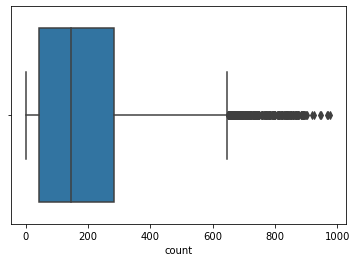

In [38]:
sns.boxplot("count",data=data)

In [39]:
IQR = data["count"].quantile(0.75)-data["count"].quantile(0.25)
data_wo = data[(data["count"].quantile(0.25)-1.5*IQR < data["count"]) & (data["count"].quantile(0.75)+1.5*IQR > data["count"])]
data_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10583 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10583 non-null  object 
 1   season      10583 non-null  int64  
 2   holiday     10583 non-null  int64  
 3   workingday  10583 non-null  int64  
 4   weather     10583 non-null  int64  
 5   temp        10583 non-null  float64
 6   atemp       10583 non-null  float64
 7   humidity    10583 non-null  int64  
 8   windspeed   10583 non-null  float64
 9   casual      10583 non-null  int64  
 10  registered  10583 non-null  int64  
 11  count       10583 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.0+ MB


C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


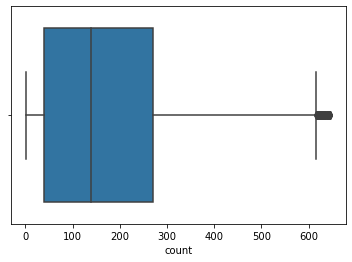

In [40]:
sns.boxplot("count",data=data_wo)

# 

# 

# 

# 

# 

# Data Visualization

In [41]:
data_wo.drop("datetime",axis=1,inplace=True)
data_wo.head()

C:\Users\sobho\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


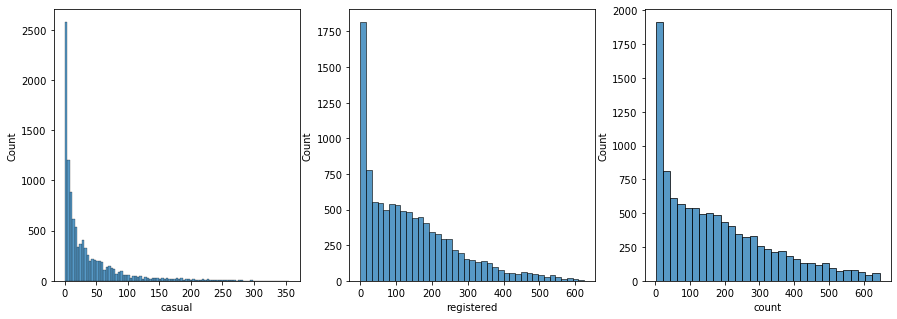

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.histplot(data_wo["casual"])
plt.subplot(132)
sns.histplot(data_wo["registered"])
plt.subplot(133)
sns.histplot(data_wo["count"])

so casual ,registered and count columns do not follows normal distribution as seen from the above plots

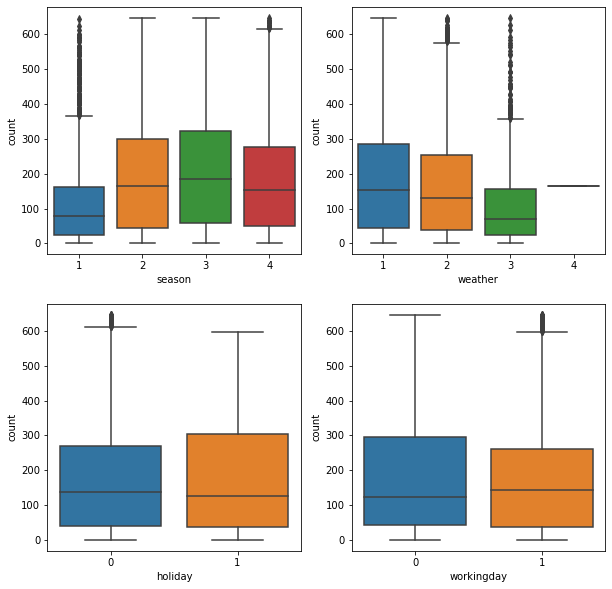

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(x="season",y="count",data=data_wo)
plt.subplot(222)
sns.boxplot(x="weather",y="count",data=data_wo)
plt.subplot(223)
sns.boxplot(x="holiday",y="count",data=data_wo)
plt.subplot(224)
sns.boxplot(x="workingday",y="count",data=data_wo)

1) As from the plot we can see that most of the vehicles are rented in the season 3.

2) Similarly most of the vehicles are rented in the weather 1.

3) Most of the vehicles are rented in holidays.

4) Same goes for workinday where most of the vehicles are rented.

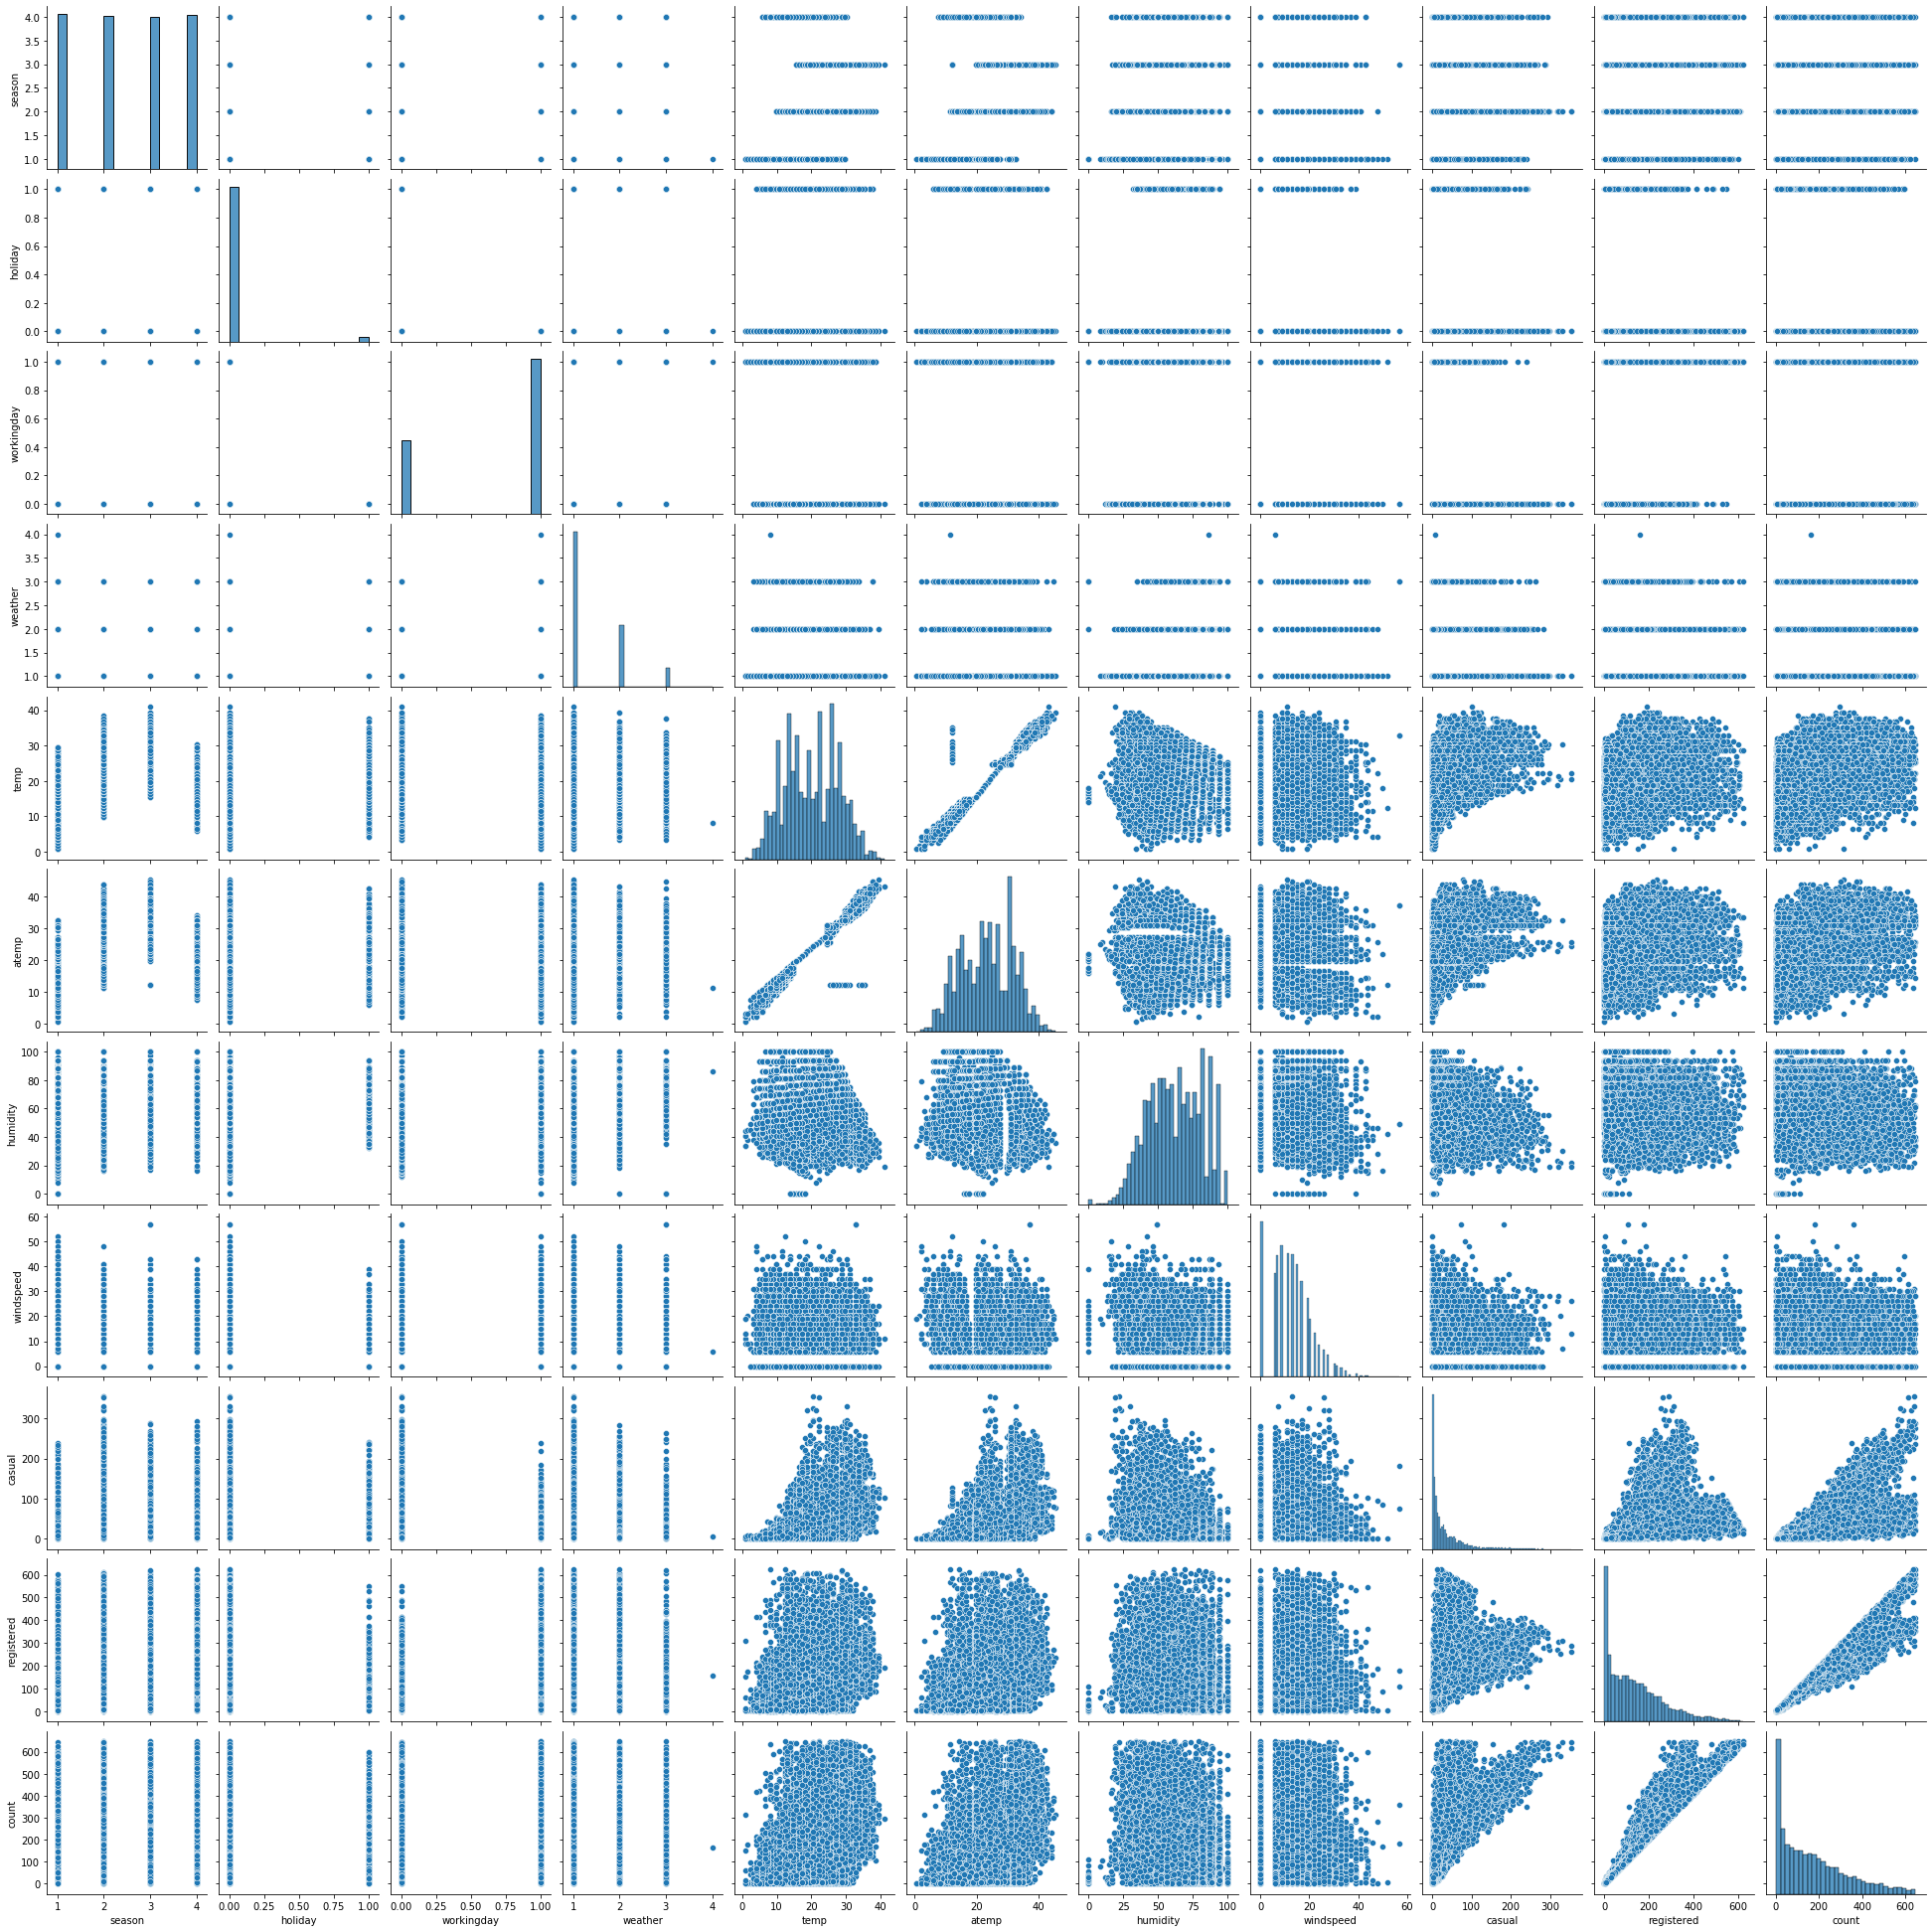

In [44]:
sns.pairplot(data_wo)

# T-test 

First before going to t-test we must check if the variance are same or not for both the samples and we will check that using levene's test

H0: population variance of the two samples are equal

Ha: population variance of the two samples are not equal

In [45]:
stats.levene(data_wo[data_wo["workingday"]==1]["count"],data_wo[data_wo["workingday"]==0]["count"])

LeveneResult(statistic=24.52443516046393, pvalue=7.450676972537556e-07)

as the p value is less than 0.05 we reject null hypothesis and conclude that population variance for both the sample are not same, but lets skip the assumption and check for ttest

H0: mean count of the rented vehicles in working day is equal to the mean count in non working days

Ha: The above means are not equal

In [46]:
data_wo_1=data_wo[data_wo["workingday"]==1]["count"]
data_wo_0=data_wo[data_wo["workingday"]==0]["count"]
stats.ttest_ind(list(data_wo_0),list(data_wo_1),equal_var=False)

Ttest_indResult(statistic=2.3894729938440786, pvalue=0.01690170701900669)

so the p_value is less than 0.05 so we reject the null hypothesis, hence we conclude that working days effects the
number of vehicles rented

# ANOVA

H0: population mean of the counts of the rented vehicles in different seasons are equal

Ha: Atleast one of the mean is not equal to the others

In [47]:
s1=data_wo[data_wo["season"]==1]["count"]
s2=data_wo[data_wo["season"]==2]["count"]
s3=data_wo[data_wo["season"]==3]["count"]
s4=data_wo[data_wo["season"]==4]["count"]
stats.f_oneway(s1,s2,s3,s4)

F_onewayResult(statistic=217.266984095718, pvalue=8.891092521664531e-137)

H0: population mean of the count of the rented vehicles in different weathers are equal

Ha: Atleast one of the mean is not equal to the others

In [48]:
w1=data_wo[data_wo["weather"]==1]["count"]
w2=data_wo[data_wo["weather"]==2]["count"]
w3=data_wo[data_wo["weather"]==3]["count"]
stats.f_oneway(w1,w2,w3)

F_onewayResult(statistic=96.56793301077968, pvalue=2.749873188252358e-42)

Conclusion: As the p_value of is less in both cases of weather and season so we reject the Null hypothesis in both the above
cases , and conclude that number of rented vehicles differs in different seasons and weather.

lets check the distribution of the groups of weather and season using qq-plots to see whether they are normally distributed or not

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


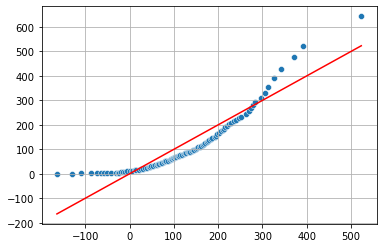

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


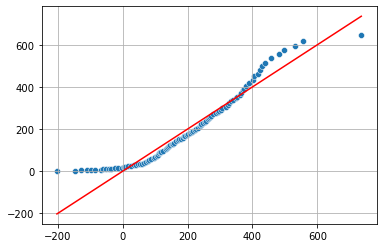

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


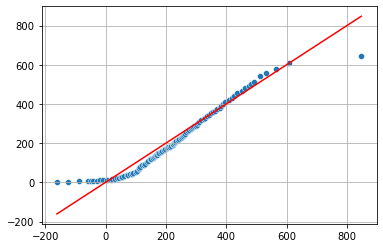

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


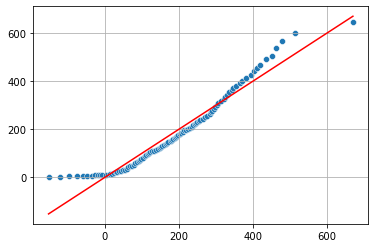

In [49]:
def qq_plot(data):
    l_data=np.array([np.percentile(data,i) for i in range(1,101)])
    dist=stats.norm.rvs(loc=data.mean(),scale=data.std(),size=1000)
    l_dist=np.array([np.percentile(dist,i) for i in range(1,101)])
    x=np.linspace(min(l_dist),max(l_dist),100)
    y=x
    sns.scatterplot(l_dist,l_data)
    sns.lineplot(x,y,color='r')
    plt.grid()
    plt.show()

for i in range(1,5):
    qq_plot(data_wo[data_wo["season"]==i]["count"])

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


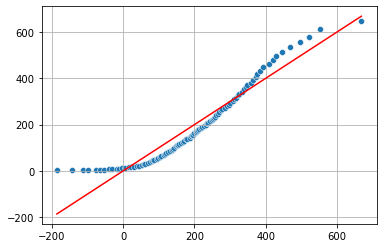

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


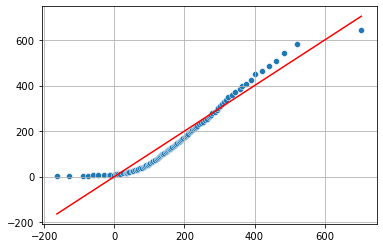

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


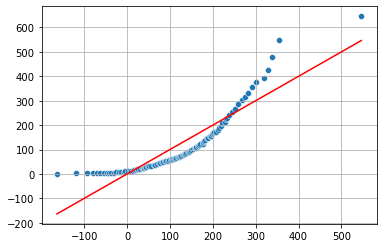

In [50]:
for i in range(1,4):
    qq_plot(data_wo[data_wo["weather"]==i]["count"])

qq-plot most of points are not on the y=x line concluding that groups are not normally distributed in either weather or season

But now let us check the criteria for anova test using Kolmogorov-Smirnov test to check the normality of each group in both the case for season and weather

In [51]:
for i in range(1,5):
    print(stats.kstest(data_wo[data_wo["season"]==i]["count"],"norm",N=100))

KstestResult(statistic=0.9487854485761653, pvalue=0.0)
KstestResult(statistic=0.9830785106276939, pvalue=0.0)
KstestResult(statistic=0.9940629460050672, pvalue=0.0)
KstestResult(statistic=0.9870134653317333, pvalue=0.0)


In [52]:
for i in range(1,5):
    print(stats.kstest(data_wo[data_wo["weather"]==i]["count"],"norm",N=100))

KstestResult(statistic=0.9778227535052846, pvalue=0.0)
KstestResult(statistic=0.9773504629792003, pvalue=0.0)
KstestResult(statistic=0.9607792798165267, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


From the kstest it is clear that the groups doesn't belong to the normal distribution in both the case for weather and season.
so lets tranform using box-cox and then check for normality and anova test

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


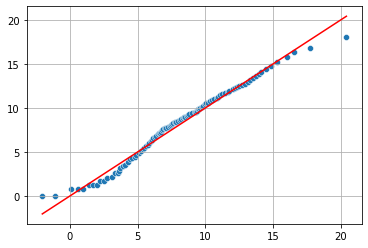

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


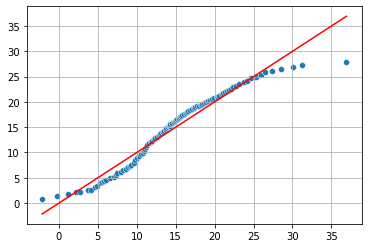

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


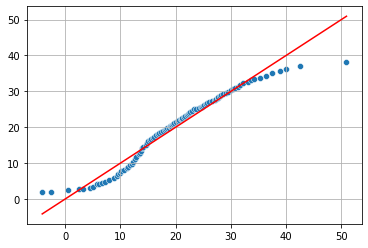

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


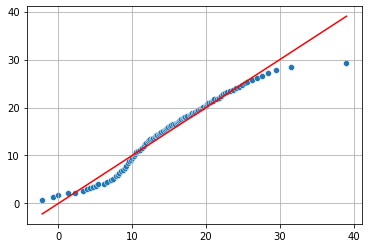

In [53]:
#Season
box_s1,l_s1=stats.boxcox(s1)
box_s2,l_s2=stats.boxcox(s2)
box_s3,l_s3=stats.boxcox(s3)
box_s4,l_s4=stats.boxcox(s4)

box_w1,l_w1=stats.boxcox(w1)
box_w2,l_w2=stats.boxcox(w2)
box_w3,l_w3=stats.boxcox(w3)
# box_w4,l_w4=stats.boxcox(w4)

for i in [box_s1,box_s2,box_s3,box_s4]:
    qq_plot(i)


C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


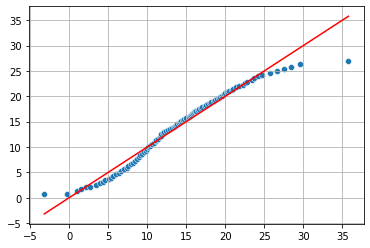

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


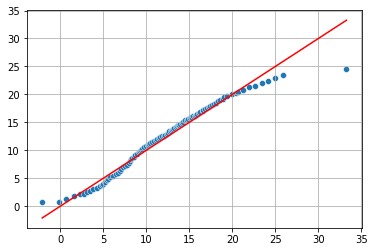

C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sobho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


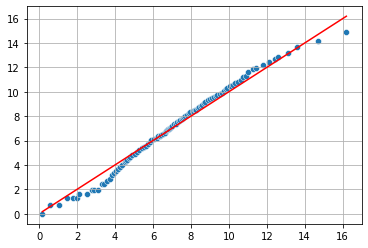

In [54]:
for i in [box_w1,box_w2,box_w3]:
    qq_plot(i)

the groups looks like they almost follows normal dist ,so lets check for anova test

1) seasons

In [55]:
stats.f_oneway(box_s1,box_s2,box_s3,box_s4)

F_onewayResult(statistic=1086.1896839037313, pvalue=0.0)

2) weather

In [56]:
stats.f_oneway(box_w1,box_w2,box_w3)

F_onewayResult(statistic=436.0754790396411, pvalue=1.0405829846992481e-182)

The group's population seems to have different means for both season and weather even after box-cox transform as the p_value is very less resulting in the rejection of null hypothesis in both the case.

# Chi-square 

H0 : weather column is independent of the season column

H1 : weather column is dependent on the season column

In [57]:
chi=pd.crosstab(data_wo["season"],data_wo[data_wo["weather"]!=4]["weather"],values=data_wo["count"],aggfunc="sum")
chi
pd.crosstab(data_wo["season"],data_wo[data_wo["weather"]!=4]["weather"],values=data_wo["count"],aggfunc="sum",margins=True)

weather,1,2,3,All
season,,,,
1,212386,75694,12919,300999
2,366757,121426,26973,515156
3,401955,120789,27883,550627
4,321709,142237,27308,491254
All,1302807,460146,95083,1858036


In [58]:
stats.chi2_contingency(chi)

(8426.467908095716,
 0.0,
 6,
 array([[211052.74827452,  74542.95065004,  15403.30107544],
        [361214.1222732 , 127579.32180862,  26362.55591818],
        [386085.47411837, 136363.77957262,  28177.74630901],
        [344454.65533391, 121659.94796872,  25139.39669737]]))

As the p-value nearly 0 and is less than 0.05 so we reject null hypothesis and conclude that weather column is dependent on the season column

# Conclusions

1) As from the plot we can see that most of the vehicles are rented in the season fall.

2) Similarly most of the vehicles are rented in the weather where there is either Clear, Few clouds, partly cloudy, partly cloudy in the sky.

3) Most of the vehicles are rented in holidays.

4) Same goes for workinday where most of the vehicles are rented.

5) From t -test we found that working days effects the number of vehicles rented.

6) From Anova we concluded that both season and weather effects the number of vehicles rented.

7) From chi-square we concluded that the number of vehicles rented in various season is dependent on the number of vehicles rented in various weathers.

# Suggestions

The company should make the vehicles more available into those places which have more cloudy weather thoughout the year.

The company should also increase the availablity of the vehicles in the season fall.